Part 1: Analyzing Best-Seller Trends Across Product Categories

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [18]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    - Are there categories where being a best-seller is more prevalent? 

In [20]:
contingency = pd.crosstab(df["category"], df["isBestSeller"])
contingency

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [21]:
category_bestseller_rate = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
category_bestseller_rate

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [22]:
category_bestseller_rate = (category_bestseller_rate[True].sort_values(ascending=False))
category_bestseller_rate.head(10)

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64

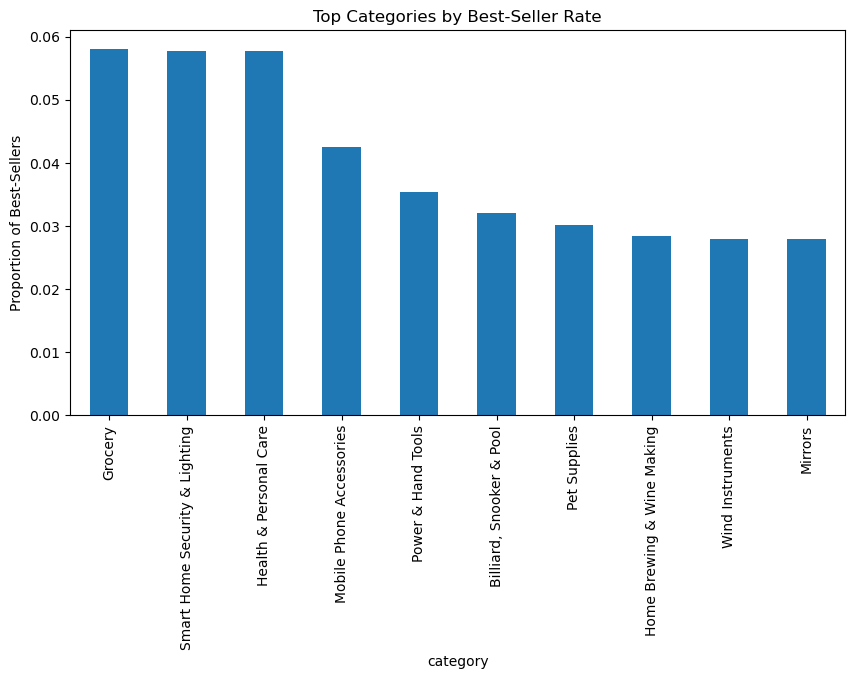

In [23]:
import matplotlib.pyplot as plt

category_bestseller_rate.head(10).plot(
    kind='bar',
    figsize=(10,5)
)

plt.ylabel("Proportion of Best-Sellers")
plt.title("Top Categories by Best-Seller Rate")
plt.show()

The proportion of best-seller products varies significantly across categories.
Categories such as Grocery, Smart Home Security & Lighting, Health & Personal Care show a higher likelihood of having best-selling products, while other categories exhibit much lower best-seller rates.
This suggests that product category plays an important role in best-seller performance on Amazon UK.

2. Statistical Tests: 
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category. 
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [26]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency)

chi2, p_value

(np.float64(36540.20270061387), np.float64(0.0))

In [27]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: Best-seller status is associated with product category.")
else:
    print("Fail to reject H0: No evidence of association.")

Reject H0: Best-seller status is associated with product category.


In [28]:
import numpy as np

n = contingency.values.sum()
k = min(contingency.shape)

cramers_v = np.sqrt(chi2 / (n * (k - 1)))

cramers_v

np.float64(0.1222829439760564)

A Chi-square test of independence was conducted to examine the relationship between product category and best-seller status.
The results indicate a statistically significant association between the two variables (χ² = ..., p < 0.05).
However, the strength of this association is weak, as indicated by a low Cramér’s V value, suggesting that category alone is not a strong predictor of best-seller status.

3. Visualizations:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

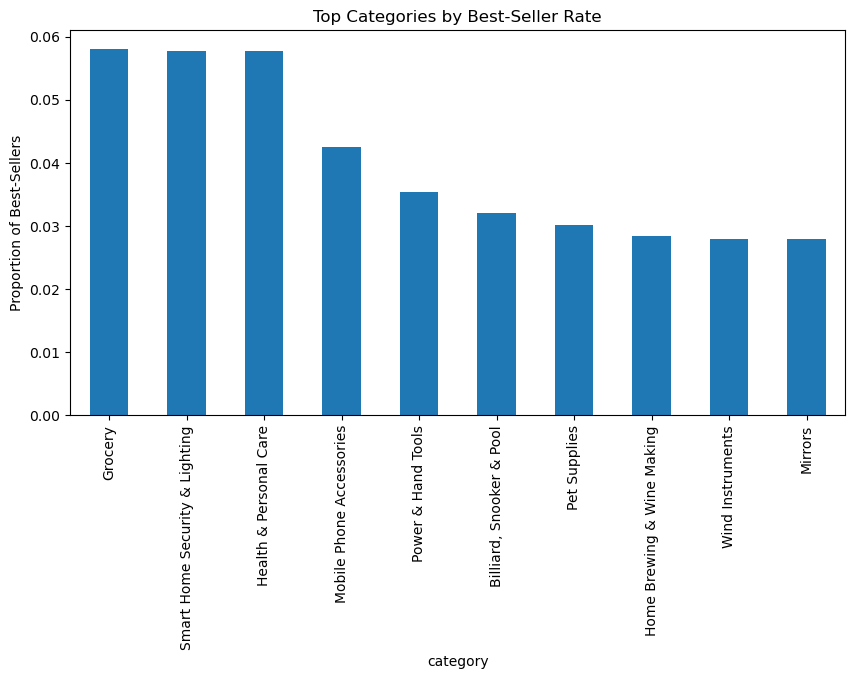

In [31]:
import matplotlib.pyplot as plt

category_bestseller_rate.head(10).plot(
    kind='bar',
    figsize=(10,5)
)

plt.ylabel("Proportion of Best-Sellers")
plt.title("Top Categories by Best-Seller Rate")
plt.show()

The proportion of best-seller products varies significantly across categories.
Categories such as Grocery, Smart Home Security & Lighting, Health & Personal Care show a higher likelihood of having best-selling products, while other categories exhibit much lower best-seller rates.
This suggests that product category plays an important role in best-seller performance on Amazon UK.

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

0. Preliminary Step: Remove outliers in product prices.

In [34]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. Violin Plots

In [35]:
top20_categories = (df_no_outliers['category'].value_counts().head(20).index)
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]
df_top20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


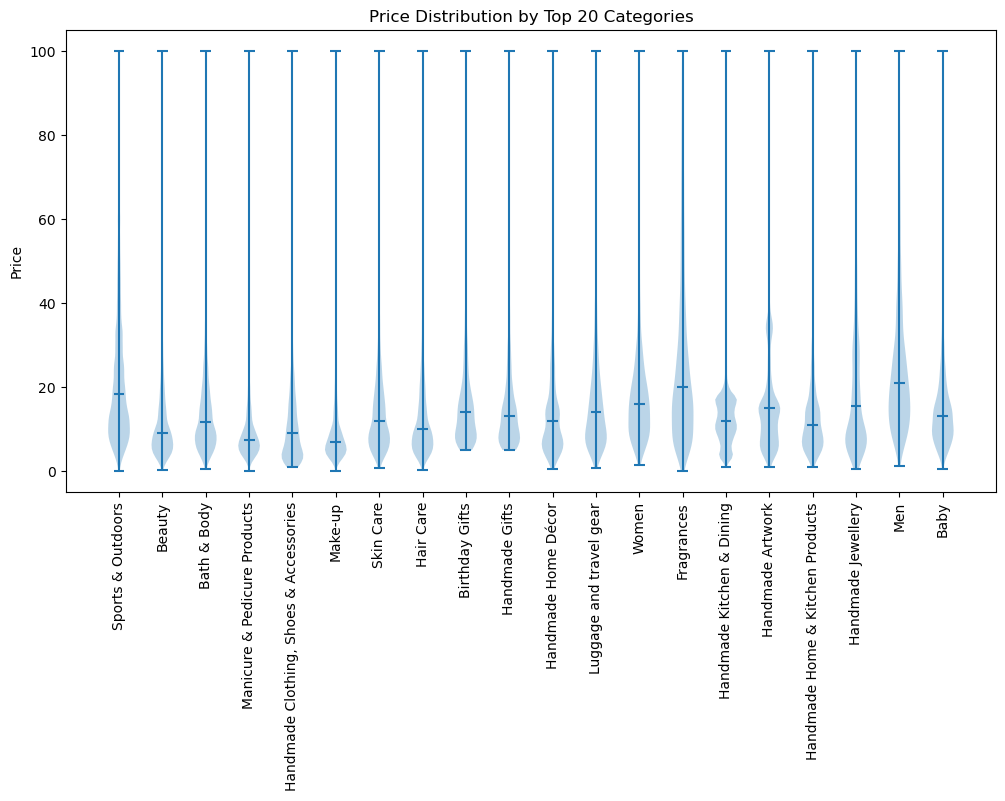

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.violinplot([df_top20[df_top20['category'] == cat]['price']
     for cat in top20_categories],
    showmedians=True)

plt.xticks(range(1, len(top20_categories) + 1), top20_categories, rotation=90)

plt.ylabel("Price")
plt.title("Price Distribution by Top 20 Categories")
plt.show()

In [37]:
median_price_by_category = (df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False))
median_price_by_category.head()

category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

The category with the highest median price is Desktop PCs.

2. Bar Charts

In [38]:
top10_categories = (df_no_outliers['category'].value_counts().head(10).index)

avg_price_top10 = (df_no_outliers[df_no_outliers['category'].isin(top10_categories)]
    .groupby('category')['price']
    .mean()
    .sort_values(ascending=False))
avg_price_top10

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

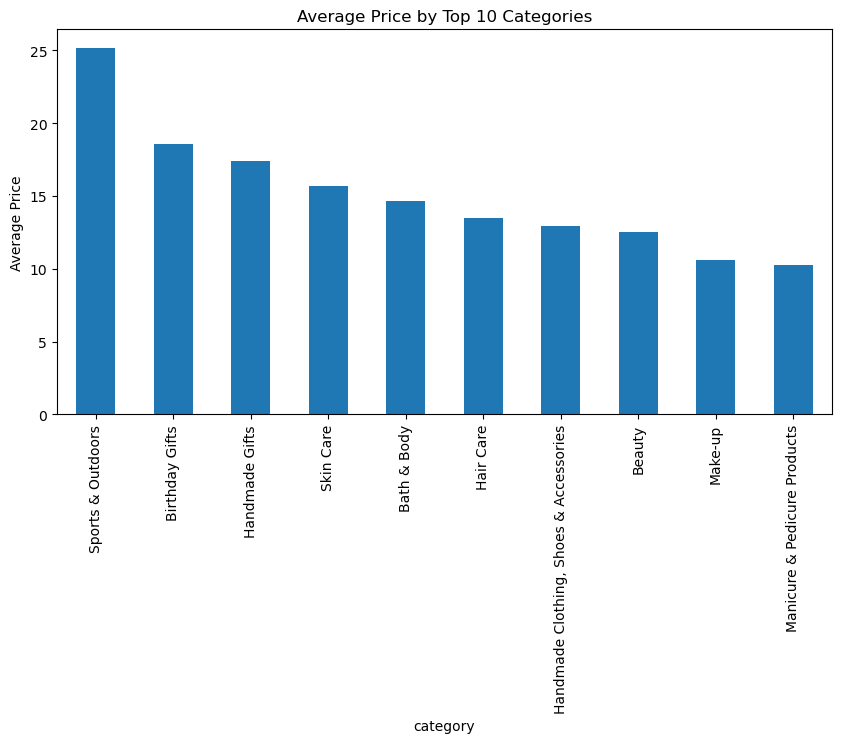

In [39]:
avg_price_top10.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average Price")
plt.title("Average Price by Top 10 Categories")
plt.show()

In [40]:
avg_price_all = (df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False))
avg_price_all.head()

category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64

The category with the highest average price is Motherboards

3. Box Plots

In [42]:
top10_categories_rating = (df_no_outliers['category'].value_counts().head(10).index)
df_rating_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories_rating)]
df_rating_top10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/63/sqz7vhsn42v0_qx7gj0dnxfr0000gn/T/ipykernel_47504/3937997367.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_rating_top10[df_rating_top10['category'] == cat]['stars']for cat in top10_categories_rating],


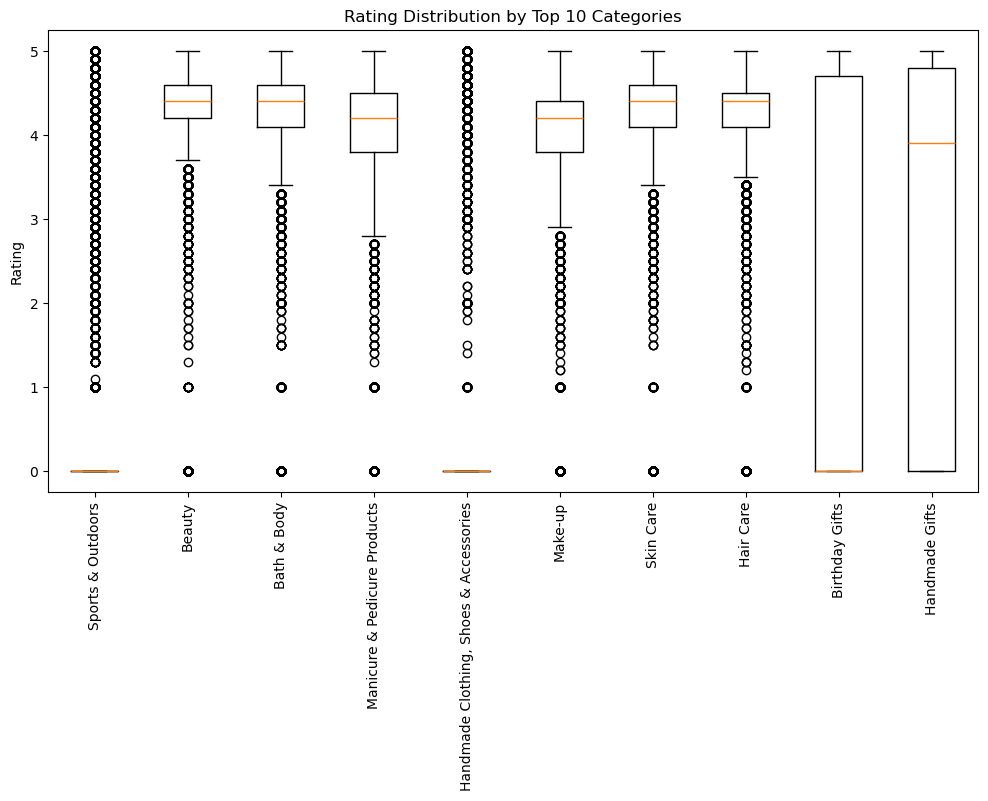

In [44]:
plt.figure(figsize=(12,6))
plt.boxplot([df_rating_top10[df_rating_top10['category'] == cat]['stars']for cat in top10_categories_rating],
            labels=top10_categories_rating)

plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title("Rating Distribution by Top 10 Categories")
plt.show()

In [46]:
median_rating_by_category = (
    df_no_outliers
    .groupby('category')['stars']
    .median()
    .sort_values(ascending=False))

median_rating_by_category.head()

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64

The category with the highest median rating is Computer Memory

After removing price outliers using the IQR method, we analyzed prices and ratings across product categories.
Violin and bar plots show that product prices vary significantly by category.
Some categories have higher median and average prices.
Box plots show that customer ratings also differ by category, with some categories receiving higher median ratings.

Part 3: Investigating the Interplay Between Product Prices and Ratings

1. Correlation Coefficients:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [47]:
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.12490673262148537)

The correlation coefficient between product price and rating is low, indicating no strong relationship between them.

2. Visualizations:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

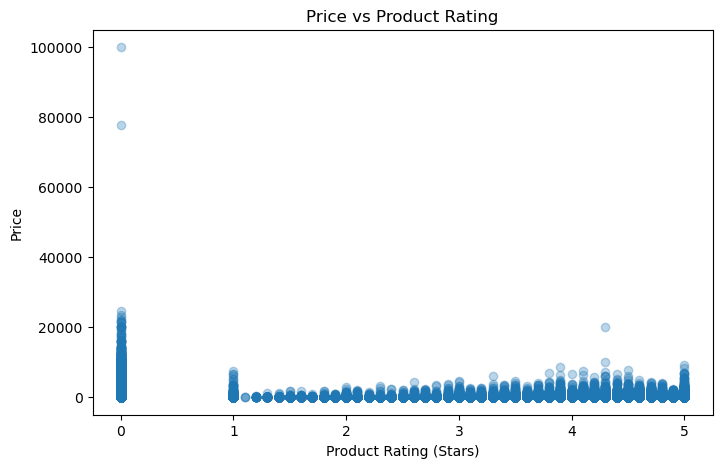

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['stars'], df['price'], alpha=0.3)
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Price")
plt.title("Price vs Product Rating")
plt.show()

The points are widely scattered with no clear pattern.
Products with similar ratings can have very different prices.

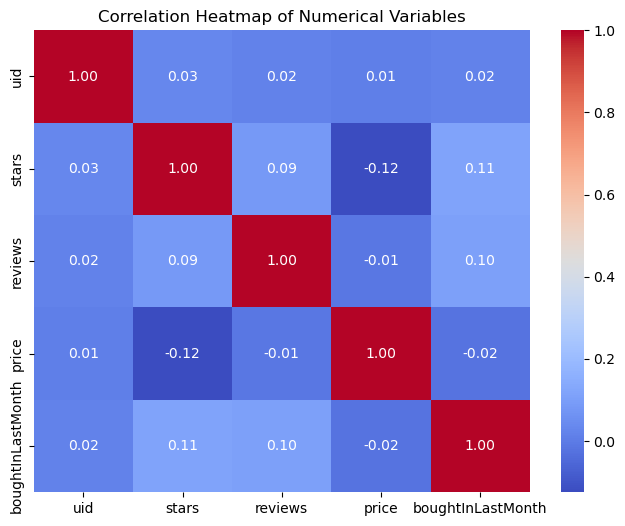

In [49]:
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

The heatmap shows a weak correlation between price and stars compared to other variables.

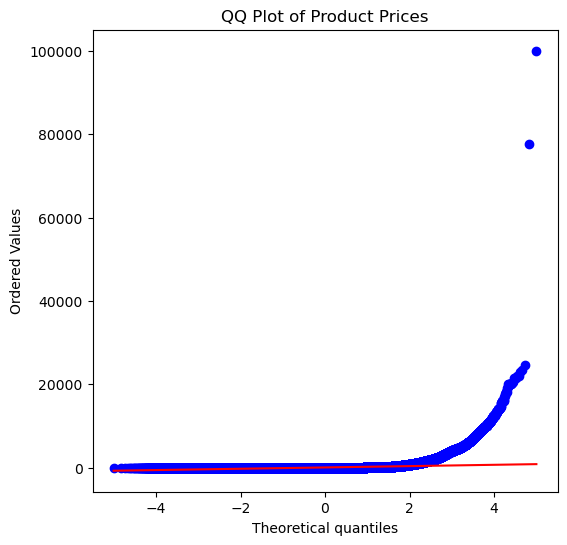

In [50]:
from scipy import stats

plt.figure(figsize=(6,6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()

The QQ plot shows that product prices are not normally distributed and are right-skewed.